In [7]:
import pandas as pd




In [9]:
import json
import requests
import pandas as pd   


from scipy import fftpack
import matplotlib.pyplot as plt
import numpy as np
from websocket import create_connection,WebSocket

import time





In [83]:



def pullStats(url):
    ms = requests.get(url+"/motorstats.json").json()
    df = pd.DataFrame(ms)
    df["date"] = pd.to_datetime(df["date"],unit="s")
    df = df.set_index("date")
    dfm = df.copy()


    cs = requests.get(url+"/camStats.json").json()
    df = pd.DataFrame(cs)
    df["date"] = pd.to_datetime(df["triggerDate"],unit="s")
    df = df.set_index("date")
    df = df.drop(columns=["triggerDate"])

    dfc = df.copy()
    
    return dfm,dfc


10000

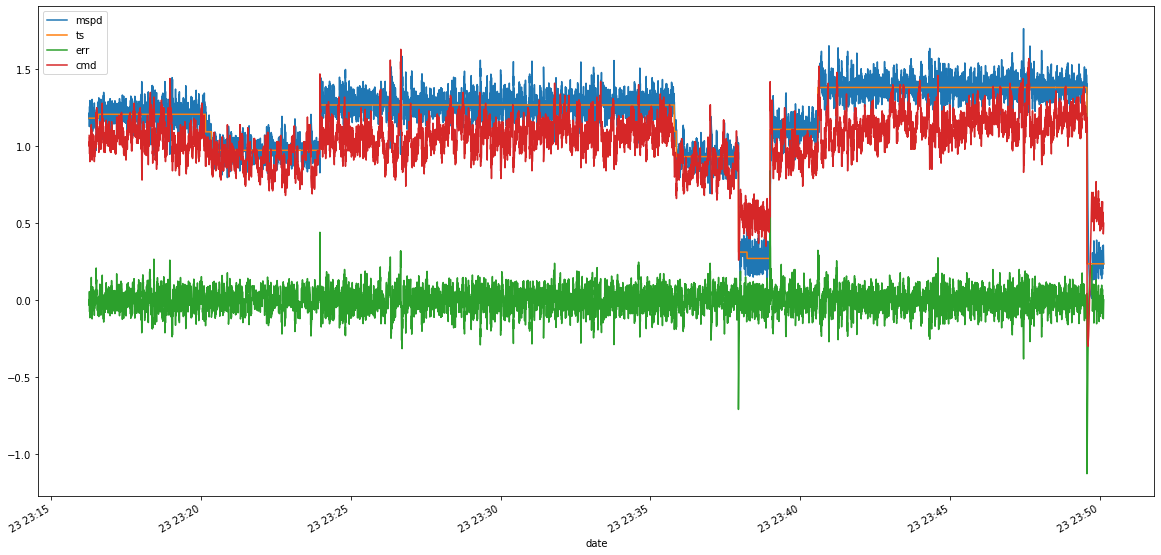

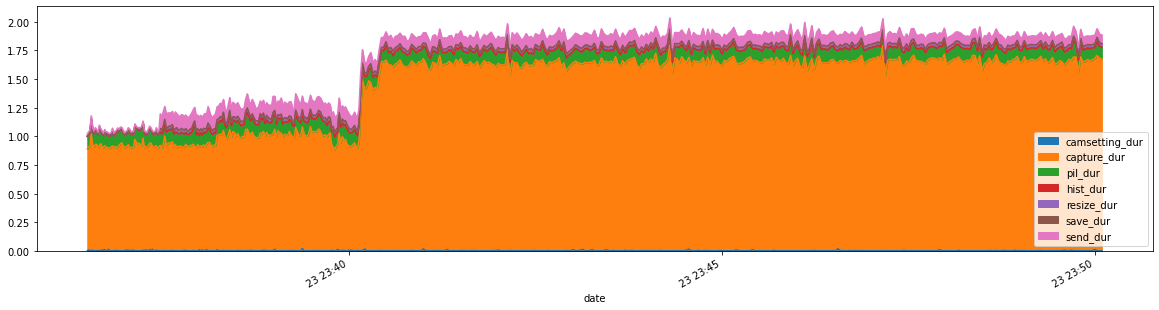

In [85]:

url="http://192.168.1.85:8000"


dfm,dfc = pullStats(url=url)
dfm.drop(columns=["rspd"]).plot(figsize=(20,10))
dfc.tail(500).plot.area(figsize=(20,5))
len(dfm)

'var 0.0064'

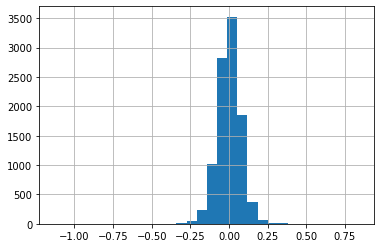

In [86]:
dfm["err"].hist(bins=30)
"var %.4f"%dfm["err"].var()

In [87]:
"revar1?? %.3f%%"%(np.abs(dfm["err"].var()/dfm["ts"].mean())*100)

'revar1?? 0.544%'

'revar2?? 2.166%'

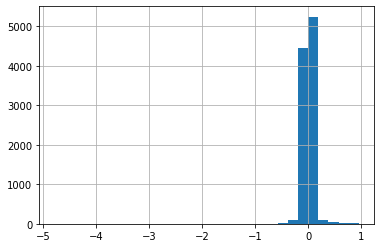

In [88]:

#calculate relative error
dfm["relerrpct"] = ((dfm["err"]/dfm["ts"]))
dfm["relerrpct"].hist(bins=30)
"revar2?? %.3f%%"%(dfm["relerrpct"].var()*100)

Text(0, 0.5, 'Phase')

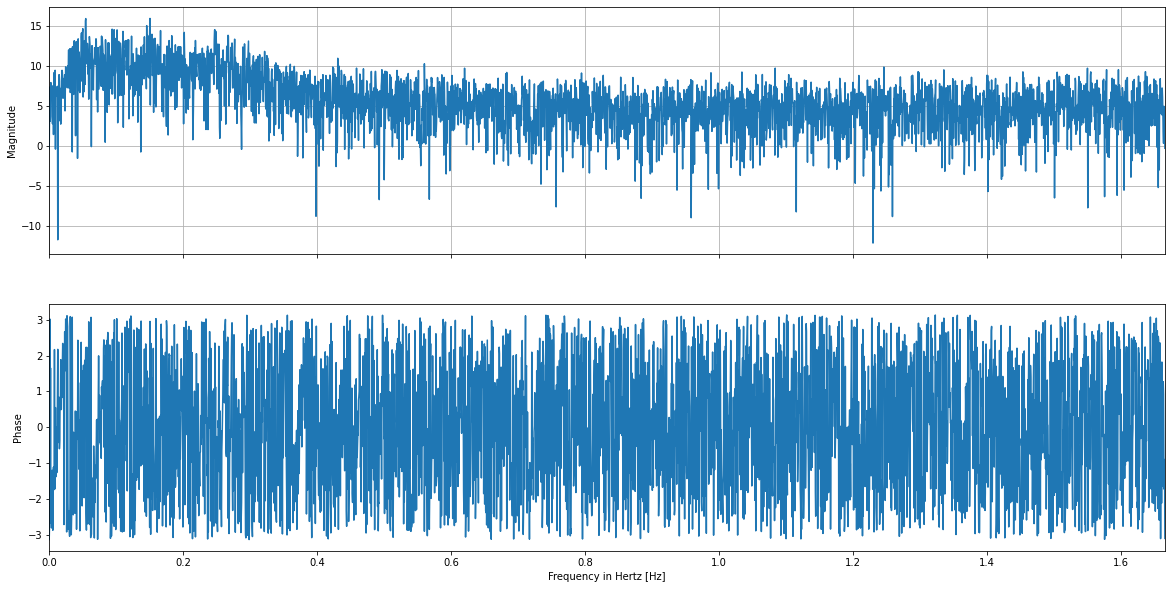

In [89]:

def makeFFT(dfm):
    f_s = 1.0/0.3
    x = dfm.resample('.3S').mean()["err"].values


    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * f_s


    cutat = int(len(X)/2)
    
    return freqs,X,cutat,f_s


freqs,X,cutat,f_s = makeFFT(dfm)




fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)

#plt.xscale("log")

axm = axes[0]
dolog = True
if dolog:
    t = 10*np.log10(np.abs(X))
else:
    t = np.abs(X)
axm.plot(freqs[:cutat],t[:cutat])

axm.set_ylabel('Magnitude')
axm.grid(True)
axm.set_xlim(0, f_s / 2)

axp = axes[1]
axp.plot(freqs[:cutat], np.angle(X)[:cutat])
axp.set_xlabel('Frequency in Hertz [Hz]')
axp.set_ylabel('Phase')


In [90]:


def makemsg(k,v): return json.dumps({"msgtype":"ctlparams","k":k,"v":v})

def settingTargetSpeed(uri,val):
    print("setting speed to .3f"%val)
    ws = create_connection(uri)
    ws.send(makemsg("T",val))

    ws.close()

def settingPID(uri,P,I,D):
    ws = create_connection(uri)
    ws.send(makemsg("P",P))
    time.sleep(.300)
    ws.send(makemsg("I",I))
    time.sleep(.300)
    ws.send(makemsg("D",D))
    time.sleep(.300)
    ws.close()

In [10]:
ws.close()

ws:WebSocket


In [20]:
uri = "ws://localhost:8765/stats"
ws = create_connection(uri)

sysstats = ws.recv()
motorstats = ws.recv()
camstats = ws.recv()
ws.close()

sysstats,motorstats,camstats

('{"msgtype": "sysInfo", "data": [{"total": 931.4960899353027, "used": 606.1567611694336, "usedpct": 65.0734627572655, "free": 325.33932876586914, "disk": "/"}]}',
 '{"msgtype": "motorstats", "data": []}',
 '{"msgtype": "camstats", "data": []}')

In [13]:
data

'{"msgtype": "sysInfo", "data": [{"total": 931.4960899353027, "used": 606.1567573547363, "usedpct": 65.07346234774181, "free": 325.3393325805664, "disk": "/"}, {"total": 931.4960899353027, "used": 606.1567573547363, "usedpct": 65.07346234774181, "free": 325.3393325805664, "disk": "/dev/shm"}]}'

In [91]:
uri = "ws://192.168.1.85:8765"


settingPID(uri,80,20,-15)

settingTargetSpeed(uri,0)

# wait to stabilize
time.sleep(30)


settingTargetSpeed(uri,-1.5)
# wait to stabilize
#time.sleep(60)


# read results

TypeError: not all arguments converted during string formatting

In [60]:
settingPID(uri,150,0,0)
# wait to stabilize
time.sleep(30)

In [ ]:
#.resample("1T").mean()

<AxesSubplot:xlabel='date'>

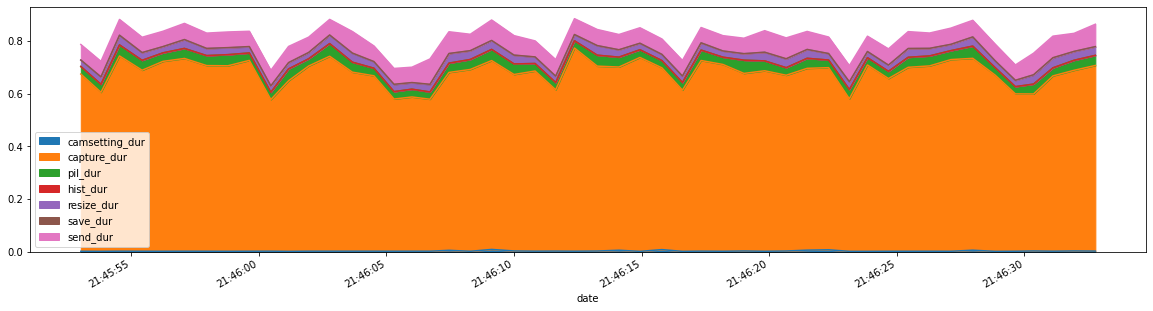

In [38]:
dfc.tail(50).plot.area(figsize=(20,5))
